In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np

# generate training and testing data

In [2]:
def gen_data(x):
    y = x * np.sin(x*10) + 1 
    y += np.random.uniform(0, 0.1, size=(len(y)))
    return y

In [3]:
# generate some fake data
x = np.linspace(-1, 1, 100)
# x = x[::6]
y = gen_data(x)

x = x.reshape(-1, 1)

In [4]:
# validation data
x_val = np.arange(-1, 1, 0.001)
y_val = gen_data(x_val)

x_val = x_val.reshape(-1, 1)

In [5]:
x_remove = np.delete(x, range(25,75))
y_remove = np.delete(y, range(25,75))

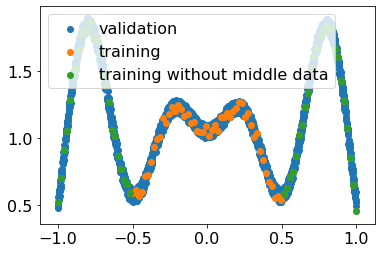

In [6]:
plt.figure()
plt.scatter(x_val, y_val, label='validation')
plt.scatter(x, y, label='training')

plt.scatter(x_remove, y_remove, label='training without middle data')

plt.legend()

# import scrinet and perform fits

In [7]:
from scrinet import fits

In [8]:
import george

In [9]:
from george import kernels

In [10]:
dir(fits.gprfit)

['GPRFit',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'george',
 'kernels',
 'np',
 'op']

In [11]:
def fit_with_gpr(x, y, jitter=1e-1):
    yerr = np.zeros(y.shape) + jitter
    fit = fits.gprfit.GPRFit(x, y, yerr=yerr)
    kernel = np.var(y) * kernels.ExpSquaredKernel(0.5, ndim=1, axes=0)
    fit.setup_kernel(kernel)
    solver = george.BasicSolver
    # solver = george.HODLRSolver
    fit.fit(solver=solver)
    fit.opt()
    return fit

In [13]:
fit = fit_with_gpr(x, y, jitter=1e-1)

In [12]:
fit_remove = fit_with_gpr(x_remove, y_remove, jitter=1e-1)

In [14]:
yhat, yhat_var = fit.predict(x)
yhat_remove, yhat_var_remove = fit_remove.predict(x)

In [15]:
x.shape

(100, 1)

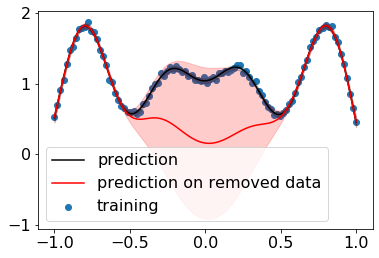

In [16]:
plt.figure()
plt.scatter(x, y, label='training')

plt.plot(x, yhat, label='prediction', c='k')
plt.fill_between(x.reshape(-1), yhat - np.sqrt(yhat_var), yhat + np.sqrt(yhat_var),
                 color="k", alpha=0.2)

plt.plot(x, yhat_remove, label='prediction on removed data', c='r')
plt.fill_between(x.reshape(-1), yhat_remove - np.sqrt(yhat_var_remove), yhat_remove + np.sqrt(yhat_var_remove),
                 color="r", alpha=0.2)


plt.legend()

In [17]:
yhat_pred, yhat_pred_var = fit.predict(x_val)
yhat_remove_pred, yhat_var_remove_pred = fit_remove.predict(x_val)

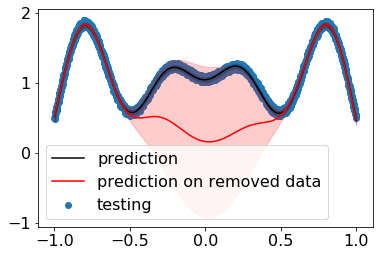

In [18]:
plt.figure()
plt.scatter(x_val, y_val, label='testing')

plt.plot(x_val, yhat_pred, label='prediction', c='k')
plt.fill_between(x_val.reshape(-1), yhat_pred - np.sqrt(yhat_pred_var), yhat_pred + np.sqrt(yhat_pred_var),
                 color="k", alpha=0.2)

plt.plot(x_val, yhat_remove_pred, label='prediction on removed data', c='r')
plt.fill_between(x_val.reshape(-1), yhat_remove_pred - np.sqrt(yhat_var_remove_pred), yhat_remove_pred + np.sqrt(yhat_var_remove_pred),
                 color="r", alpha=0.2)

plt.legend()

Text(0.5, 1.0, 'training set difference')

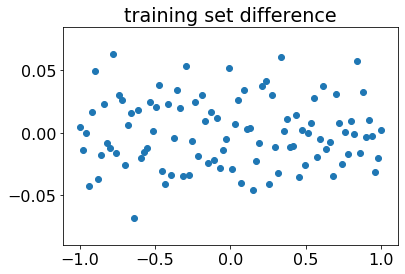

In [19]:
plt.figure()
plt.scatter(x, y - yhat)
plt.title("training set difference")

Text(0.5, 1.0, 'validation set difference')

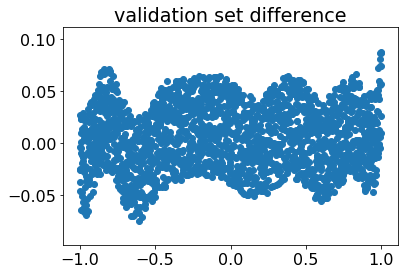

In [20]:
plt.figure()
plt.scatter(x_val, y_val - yhat_pred)
plt.title("validation set difference")